<a href="https://colab.research.google.com/github/PrathameshAiwale/Combined-cycle-powerplant-energy-prediction/blob/main/Power_Plant_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Import the pandas library
import pandas as pd

# Step 2: Read the uploaded CSV file
df = pd.read_csv("power_plant_data.csv")  # Make sure this matches your file name exactly

# Step 3: Show the first 5 rows to confirm it loaded correctly
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
# View basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
# View summary statistics
df.describe()


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
# Check for missing values
df.isnull().sum()


,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
# View column names
df.columns


Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

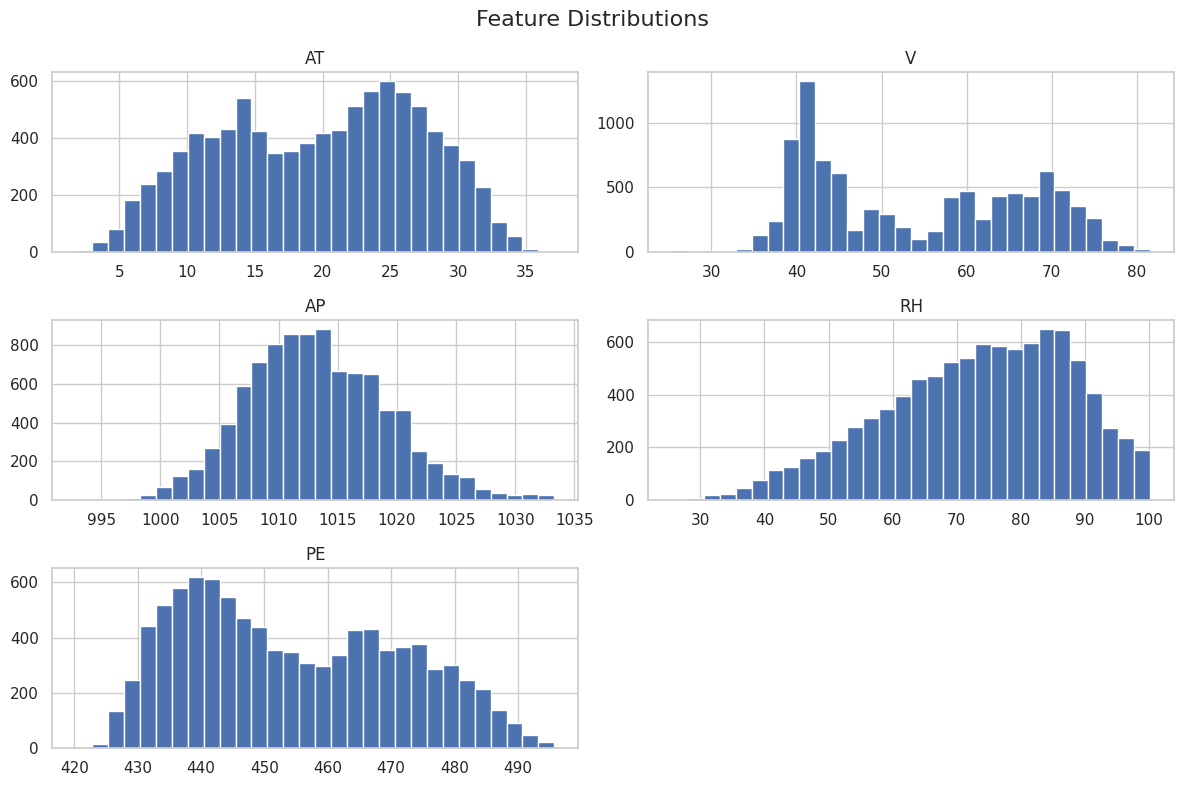

In [9]:
# Plot histograms for each column
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


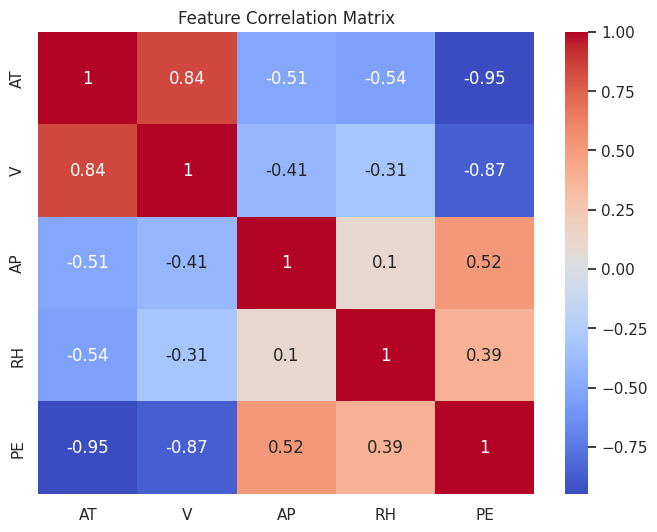

In [10]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [12]:
# Separate features (X) and target (y)
X = df.drop('PE', axis=1)  # All columns except PE
y = df['PE']               # Target column (what we want to predict)


In [13]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [16]:
# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)


In [17]:
# Create and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)


In [18]:
# Calculate RMSE for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr:.3f}")

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.3f}")


Linear Regression RMSE: 4.503
Random Forest RMSE: 3.246


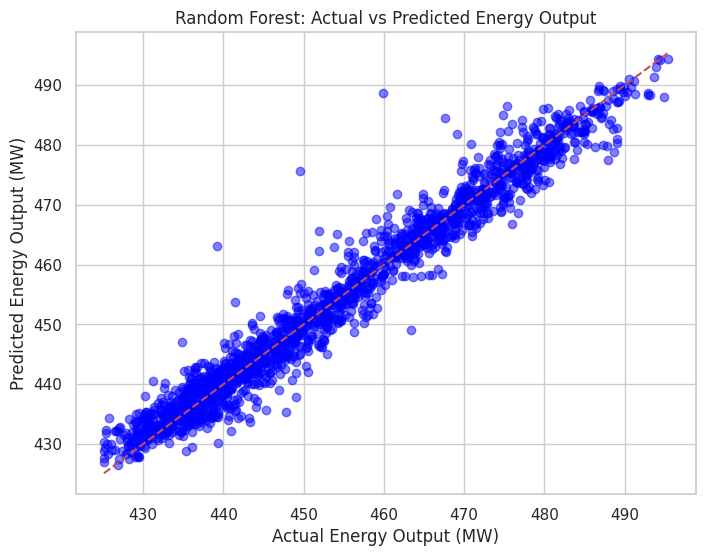

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Energy Output (MW)')
plt.ylabel('Predicted Energy Output (MW)')
plt.title('Random Forest: Actual vs Predicted Energy Output')
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.3f}")


Random Forest MAE: 2.330
